In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_q3 = pd.read_csv("DATA/q3_data",sep="\t", header=None) 
df_q3.columns = ["city", "country", "year", "avg"]

print('Percentage of missing data')
print((df_q3.isnull().sum() / len(df_q3))*100)

Percentage of missing data
city       0.000000
country    0.000000
year       0.486227
avg        3.476569
dtype: float64


In [15]:
df_q3

,city,country,year,avg
0,Aba,Nigeria,1856.0,26.828000
1,Aba,Nigeria,1857.0,25.232428
2,Aba,Nigeria,1858.0,26.111500
3,Aba,Nigeria,1859.0,25.954300
4,Aba,Nigeria,1860.0,26.118364
...,...,...,...,...
717973,San Nicolás De Los Garza,Mexico,2010.0,21.987750
717974,San Nicolás De Los Garza,Mexico,2011.0,23.552750
717975,San Nicolás De Los Garza,Mexico,2012.0,23.502583
717976,San Nicolás De Los Garza,Mexico,2013.0,24.192778


In [16]:
key = df_q3["city"] + " " + df_q3["country"]
key

0                             Aba Nigeria
1                             Aba Nigeria
2                             Aba Nigeria
3                             Aba Nigeria
4                             Aba Nigeria
                       ...               
717973    San Nicolás De Los Garza Mexico
717974    San Nicolás De Los Garza Mexico
717975    San Nicolás De Los Garza Mexico
717976    San Nicolás De Los Garza Mexico
717977    San Nicolás De Los Garza Mexico
Length: 717978, dtype: object

In [17]:
df_q3["key"] = key
df_q3

,city,country,year,avg,key
0,Aba,Nigeria,1856.0,26.828000,Aba Nigeria
1,Aba,Nigeria,1857.0,25.232428,Aba Nigeria
2,Aba,Nigeria,1858.0,26.111500,Aba Nigeria
3,Aba,Nigeria,1859.0,25.954300,Aba Nigeria
4,Aba,Nigeria,1860.0,26.118364,Aba Nigeria
...,...,...,...,...,...
717973,San Nicolás De Los Garza,Mexico,2010.0,21.987750,San Nicolás De Los Garza Mexico
717974,San Nicolás De Los Garza,Mexico,2011.0,23.552750,San Nicolás De Los Garza Mexico
717975,San Nicolás De Los Garza,Mexico,2012.0,23.502583,San Nicolás De Los Garza Mexico
717976,San Nicolás De Los Garza,Mexico,2013.0,24.192778,San Nicolás De Los Garza Mexico


In [18]:
places = np.unique(df_q3["key"])
print(places.size)
places

3491


array(['A Coruña Spain', 'Aachen Germany', 'Aalborg Denmark', ...,
       'Çorum Turkey', 'Öskemen Kazakhstan', 'Ürümqi China'], dtype=object)

In [23]:
std_q3 = pd.DataFrame(columns = ["std", "key"])
#std_q2.columns = ["std", "key"]
std_q3["key"] = places
std = []
for p in places:
    std.append(np.std(df_q3[df_q3["key"] == p]["avg"]))

std_q3["std"] = std

std_q3

,std,key
0,0.680458,A Coruña Spain
1,0.946063,Aachen Germany
2,1.051962,Aalborg Denmark
3,0.527615,Aba Nigeria
4,1.505297,Abadan Iran
...,...,...
3486,1.051962,Århus Denmark
3487,0.968841,Çorlu Turkey
3488,0.867978,Çorum Turkey
3489,1.321266,Öskemen Kazakhstan


In [25]:
top = std_q3.sort_values(by=['std'], ascending=False).head(30)["key"]
bot = std_q3.sort_values(by=['std'], ascending=True).head(30)["key"]
tips = list(top) + list(bot)
top

2345           Peoria United States
3404                   Yichun China
2148          Nizhnevartovsk Russia
866                 Edmonton Canada
3329                Winnipeg Canada
157         Arlington United States
1404                   Jining China
3122           Topeka United States
2214           Olathe United States
2750               Saskatoon Canada
2559                  Regina Canada
2848      Sioux Falls United States
1603                    Korla China
1117                 Haicheng China
3159            Tulsa United States
510                  Calgary Canada
1279     Independence United States
1472      Kansas City United States
2260    Overland Park United States
2221            Omaha United States
1732          Lincoln United States
3325          Wichita United States
108         Anchorage United States
2870               Solikamsk Russia
2160                 Norilsk Russia
2213             Oktyabrskiy Russia
2223                    Omsk Russia
140               Aqtöbe Kaz

In [27]:
df_q3[df_q3["key"].isin(top)]

,city,country,year,avg,key
26273,Omsk,Russia,1812.0,-1.321750,Omsk Russia
26274,Omsk,Russia,1813.0,-1.572091,Omsk Russia
26275,Omsk,Russia,1814.0,-0.813273,Omsk Russia
26276,Omsk,Russia,1815.0,-14.348000,Omsk Russia
26277,Omsk,Russia,1816.0,3.713889,Omsk Russia
...,...,...,...,...,...
687388,Nizhnevartovsk,Russia,2010.0,-3.047667,Nizhnevartovsk Russia
687389,Nizhnevartovsk,Russia,2011.0,0.055083,Nizhnevartovsk Russia
687390,Nizhnevartovsk,Russia,2012.0,-0.177250,Nizhnevartovsk Russia
687391,Nizhnevartovsk,Russia,2013.0,0.005500,Nizhnevartovsk Russia


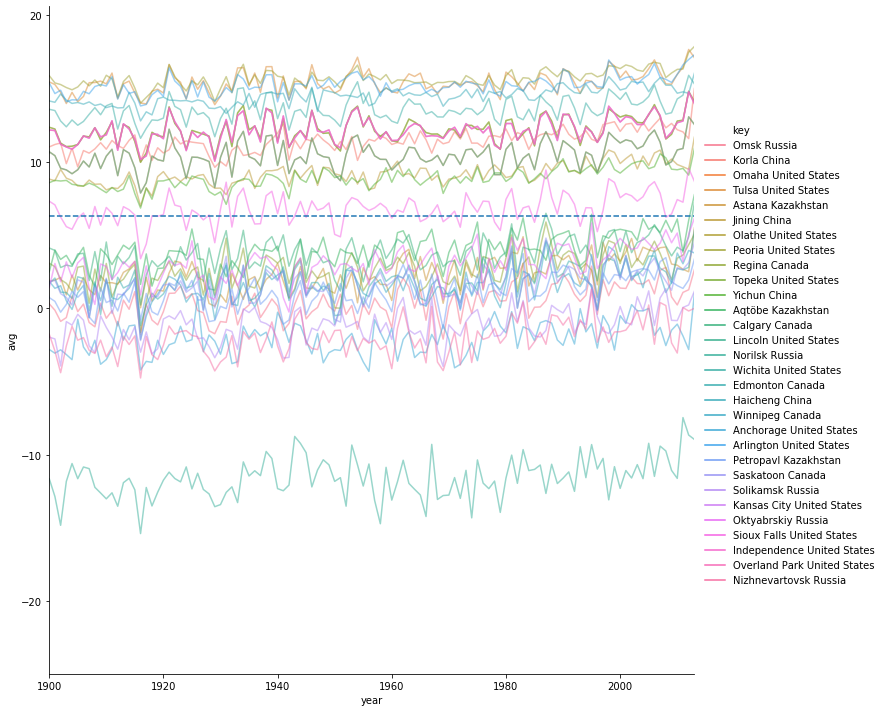

In [29]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
m = df_q3[df_q3["key"].isin(top)]["avg"].mean(axis=0)
#m = df_q3["avg"].mean(axis=0)
g = sns.relplot(x="year", y="avg", hue="key", kind="line", ci=None, data=df_q3[df_q3["key"].isin(top)], height=10, alpha=0.5).set(xlim=(1900,2013))
#g = sns.relplot(x="year", y="avg", hue="key", kind="line", ci=None, data=df_q3, height=10, alpha=0.5).set(xlim=(1900,2013))
ax0 = g.ax
ax0.axhline(m, ls='--')
plt.show()

In [75]:
g.ax